In [1]:
import pydub as pdb

In [2]:
exfile = pdb.AudioSegment.from_mp3("../_data/mp3s/giggling/0007_giggling_86991.mp3")

In [3]:
print(exfile.channels, len(exfile))
exfile[:4000]

2 8592


In [4]:
def plot_stereo(chL, chR, srate=44100, bdepth=16, mono=False):
    assert len(chL) == len(chR)
    
    chL = chL / (2**(bdepth-1))
    chR = chR / (2**(bdepth-1))
    
    samps_per_ms = srate / 1000
    
    xx = np.arange(len(chL)) / samps_per_ms
    
    if mono:
        plt.figure(figsize=(8, 3))
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("Mono")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    else:
        plt.subplot(2, 1, 1)
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("L")
        plt.xlabel("ms"); plt.ylabel("amplitude")

        plt.subplot(2, 1, 2)
        plt.plot(xx, chR)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("R")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    plt.tight_layout()
    plt.show()
    

def plot_audio(audioseg):
    audioseg_list = audioseg.get_array_of_samples().tolist()

    if audioseg.channels == 2:
        mono = False
        chL = np.array(audioseg_list[::2])
        chR = np.array(audioseg_list[1::2])
    elif audioseg.channels == 1:
        mono = True
        chL = np.array(audioseg_list)
        chR = np.array(chL)
    else:
        print("More than 2 channels not supported")
        return

    plot_stereo(chL, chR, audioseg.frame_rate, audioseg.sample_width*8, mono)    

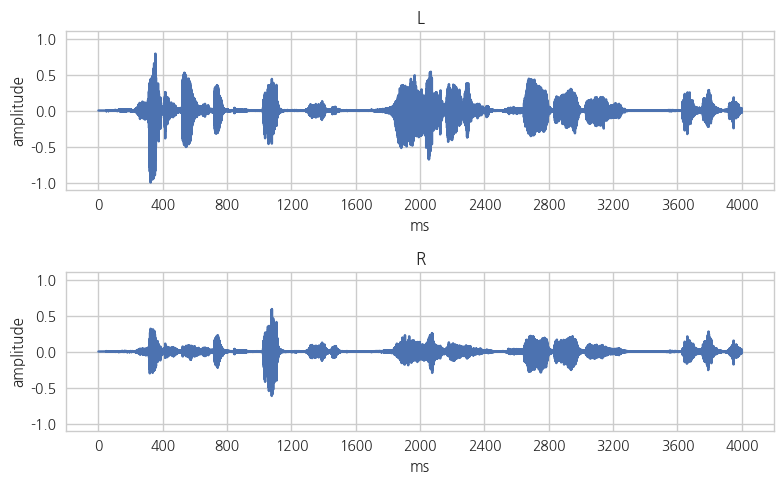

In [5]:
plot_audio(exfile[:4000])#, mono=True)

In [6]:
exfile_mono = exfile.set_channels(1)

In [12]:
exm_arr = exfile_mono.get_array_of_samples()

In [13]:
exm_list = exm_arr.tolist()

In [14]:
len(exm_list)

412416

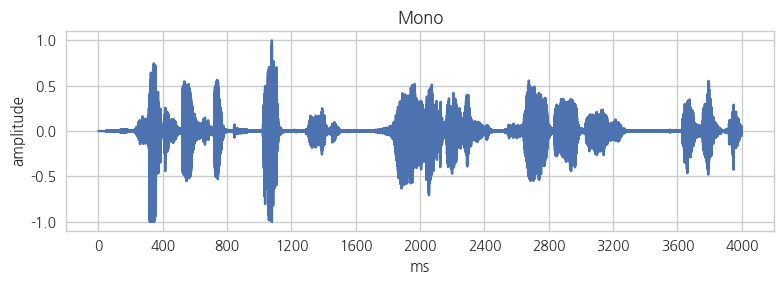

In [33]:
plot_audio(exfile_mono[:4000])

In [142]:
max(exfile.get_array_of_samples().tolist())

25886

In [143]:
exfile.sample_width

2

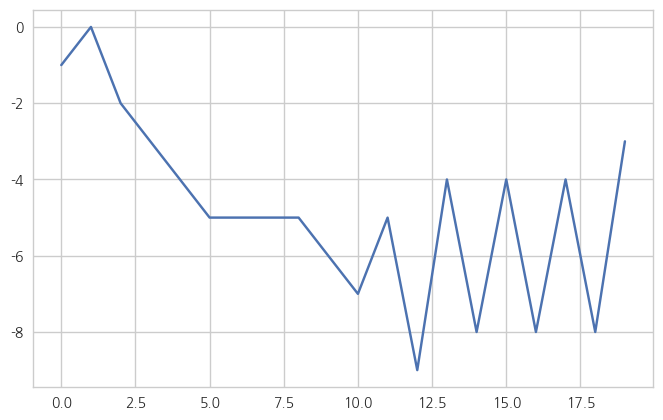

In [47]:
plt.plot(exfile_arr[:20])

In [42]:
exfile.duration_seconds

0.5672335600907029

In [45]:
len(exfile_arr)

50030

In [44]:
exfile.frame_rate

44100

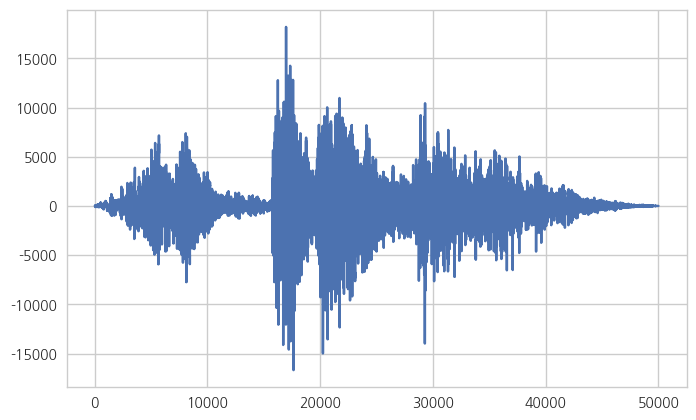

In [41]:
plt.plot(exfile_fo_arr)